#Initial data loading

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd



In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
original_data=pd.read_csv('/content/gdrive/MyDrive/Ml_project/Tweets_train.csv')
data_test=pd.read_csv('/content/gdrive/MyDrive/Ml_project/Tweets_test.csv',encoding = "ISO-8859-1")
data_valid=pd.read_csv('/content/gdrive/MyDrive/Ml_project/Tweets_dev.csv',encoding = "ISO-8859-1")

In [ ]:
data_test

,Unnamed: 0,tweet_id,text,airline_sentiment
0,0,568107472260624384,great job celebrating industry another reason ...,positive
1,1,568215698524246016,thanks taking upnotch leinenkugels norfolk,positive
2,2,567842466851905536,put back hold hour completely unacceptable,negative
3,3,568834824410148864,thank offer sorted,positive
4,4,569590527349252096,wondering possible colleague andto get earlier...,neutral
...,...,...,...,...
1310,1313,570060687164067840,sorry disappointed kid job,negative
1311,1314,570101371409559552,stuck onplane dallas thats supposed going okc ...,negative
1312,1315,568572753403650049,lost wallet flight yesterday houston bogota fi...,negative
1313,1316,567747769176432640,travelling pwm atl sunday flight got cancelled...,negative


#Data Exploration

## before balancing

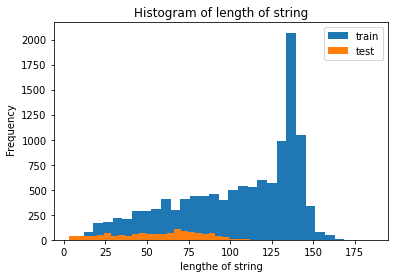

In [ ]:
import matplotlib.pyplot as plt

plt.hist(original_data.text.str.len(), bins=30, label='train')
plt.hist(data_test.text.str.len(), bins=30, label='test')
plt.legend()
plt.xlabel("lengthe of string")
plt.ylabel(" Frequency")
plt.title("Histogram of length of string")
plt.show()

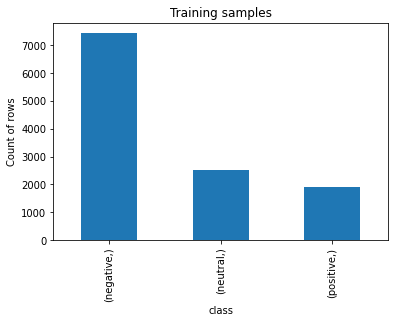

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

k=pd.DataFrame(original_data['airline_sentiment'])
k.value_counts().plot(kind='bar')
plt.title('Training samples')
plt.ylabel('Count of rows')
plt.xlabel('class')
plt.show()

In [ ]:
original_data['airline_sentiment'].value_counts()

negative    7434
neutral     2510
positive    1914
Name: airline_sentiment, dtype: int64

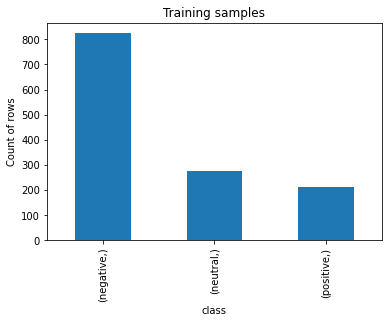

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

k=pd.DataFrame(data_test['airline_sentiment'])
k.value_counts().plot(kind='bar')
plt.title('Training samples')
plt.ylabel('Count of rows')
plt.xlabel('class')
plt.show()

which word occured more?

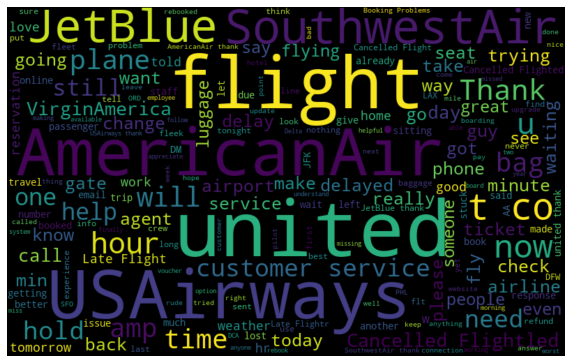

In [ ]:
word_bag = ' '.join([text for text in original_data["text"]]) 
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word_bag) 
plt.figure(figsize=(10, 7)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.axis('off')
plt.title(" Plot representing the most occuring words ")
plt.show()

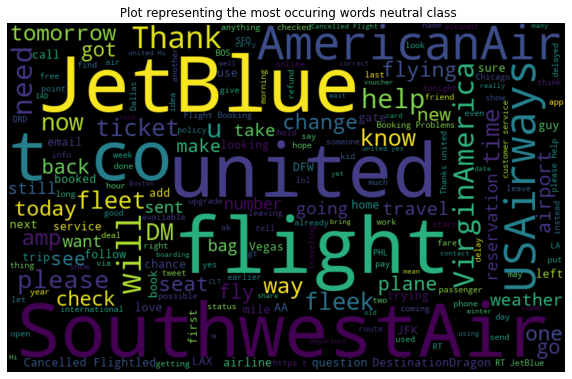

In [ ]:
neutr_word = ' '.join([text for text in original_data['text'][original_data['airline_sentiment'] == 'neutral']])
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutr_word) 
plt.figure(figsize=(10, 7)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.title(" Plot representing the most occuring words neutral class")
plt.axis('off')
plt.show()

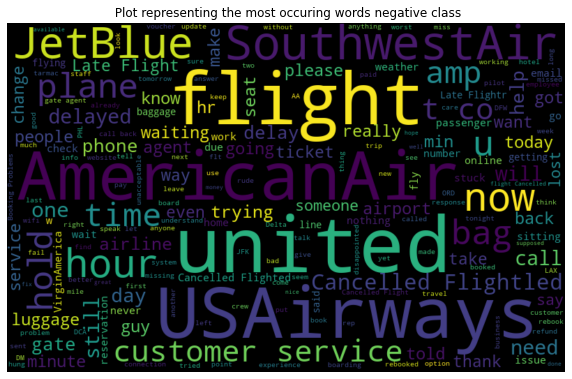

In [ ]:
negative_word = ' '.join([text for text in original_data['text'][original_data['airline_sentiment'] == 'negative']])
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_word) 
plt.figure(figsize=(10, 7)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.title(" Plot representing the most occuring words negative class")
plt.axis('off')
plt.show()

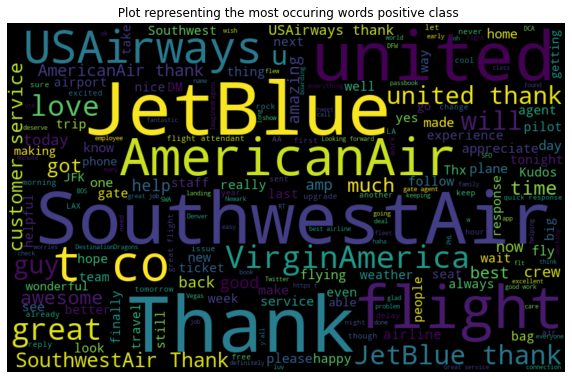

In [ ]:
positive_word = ' '.join([text for text in original_data['text'][original_data['airline_sentiment'] == 'positive']])
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_word) 
plt.figure(figsize=(10, 7)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.title(" Plot representing the most occuring words positive class")
plt.axis('off')
plt.show()

Checking for missing values

In [ ]:
original_data.isnull().sum()

tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

#preprocessing


In [ ]:
# Import stopwords
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop_words_a = stopwords.words('english')
# Import textblob
from textblob import Word, TextBlob
custom_stopwords_a = ['']
def preprocess_tweets(tweet, custom_stopwords_a):
    processed_tweet_a = tweet
    processed_tweet_a.lower
    processed_tweet_a = " ".join(word for word in processed_tweet_a.split() if word not in stop_words_a)
    processed_tweet_a = " ".join(word for word in processed_tweet_a.split() if word not in custom_stopwords_a)
    processed_tweet_a = " ".join(Word(word).lemmatize() for word in processed_tweet_a.split())
    return(processed_tweet_a)

original_data['text'] = original_data['text'].replace(r'#\w+|@\w+|https?:\/\/\S+', '', regex=True) #url removing
original_data['text'] = original_data['text'].replace(r'\s+[a-zA-Z]\s+','',regex=True) #single charector removing
original_data['text'] = original_data['text'].replace(r'[^A-Za-z ]+', '', regex=True) # removing special charecters and numbers
original_data['text'] = original_data['text'].replace(r'\s+',' ',regex=True)# removing multiple spaces
original_data['text'] = original_data['text'].str.lower() # lower 

data_test['text'] = data_test['text'].replace(r'#\w+|@\w+|https?:\/\/\S+', '', regex=True)
data_test['text'] = data_test['text'].replace(r'\s+[a-zA-Z]\s+','',regex=True)
data_test['text'] = data_test['text'].replace(r'[^A-Za-z ]+', '', regex=True)
data_test['text'] = data_test['text'].replace(r'\s+',' ',regex=True)
data_test['text'] = data_test['text'].str.lower() # lower


data_valid['text'] = data_valid['text'].replace(r'#\w+|@\w+|https?:\/\/\S+', '', regex=True)#url removing
data_valid['text'] = data_valid['text'].replace(r'\s+[a-zA-Z]\s+','',regex=True)
data_valid['text'] = data_valid['text'].replace(r'[^A-Za-z ]+', '', regex=True)
data_valid['text'] = data_valid['text'].replace(r'\s+',' ',regex=True)
data_valid['text'] = data_valid['text'].str.lower() # lower


original_data['text']= original_data['text'].apply(lambda x: preprocess_tweets(x, custom_stopwords_a))
data_test['text']= data_test['text'].apply(lambda x: preprocess_tweets(x, custom_stopwords_a))
data_valid['text']= data_valid['text'].apply(lambda x: preprocess_tweets(x, custom_stopwords_a))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#empty string/null checking/single charecter Handling

In [ ]:
original_data.drop(original_data[original_data['text'].apply(lambda x: len(x)==0)].index,inplace=True)
original_data.drop(original_data[original_data['text'].apply(lambda x: len(x)==1)].index,inplace=True)
original_data.drop(original_data[original_data['text'].apply(lambda x: len(x)==2)].index,inplace=True)
original_data.dropna()

,tweet_id,text,airline_sentiment
0,569179849518161920,youre good thank,positive
1,569835751275433984,way ruinvacation brother called night multiple...,negative
2,568588936852799488,yes thankfully catering got loading frustrated...,positive
3,569525116725567491,automated message isnt helpful impossible spea...,negative
5,569617089155211265,downloaded app iphone notice drink coupon noth...,neutral
...,...,...,...
11853,570123872168574976,help u phone gate checkinbook travel client ca...,negative
11854,570063683256242177,worst customer service line ive called time to...,negative
11855,568032524749942784,grade tripflight timeliness cancelled flightat...,negative
11856,569705813142409217,thanks vague canned response doesnt address issue,negative


In [ ]:
data_valid.drop(data_valid[data_valid['text'].apply(lambda x: len(x)==0)].index,inplace=True)
data_valid.drop(data_valid[data_valid['text'].apply(lambda x: len(x)==1)].index,inplace=True)
data_valid.drop(data_valid[data_valid['text'].apply(lambda x: len(x)==2)].index,inplace=True)
data_valid.dropna()
data_valid

,Unnamed: 0,tweet_id,text,airline_sentiment
0,0,570252000000000000,need refund,negative
1,1,568173000000000000,cancelled flightlations anddelay causing miss ...,negative
2,2,569321000000000000,thanks much cant wait fly guy,positive
3,3,569503000000000000,never frustrated conversation united cant spea...,negative
4,4,568981000000000000,worst hold time crazy agent horrible accountab...,negative
...,...,...,...,...
1454,1459,569678000000000000,didnt miss flight american airline gave ticket...,negative
1455,1460,569882000000000000,sitting hold hr flight cancelled flighted disc...,negative
1456,1461,568192000000000000,hadgreat flight damion best,positive
1457,1462,569775000000000000,aa return jfk thanks,neutral


In [ ]:
original_data['airline_sentiment'].value_counts()

negative    7430
neutral     2493
positive    1911
Name: airline_sentiment, dtype: int64

In [ ]:
data_test

,Unnamed: 0,tweet_id,text,airline_sentiment
0,0,568107472260624384,great job celebrating industry another reason ...,positive
1,1,568215698524246016,thanks taking upnotch leinenkugels norfolk,positive
2,2,567842466851905536,put back hold hour completely unacceptable,negative
3,3,568834824410148864,thank offer sorted,positive
4,4,569590527349252096,wondering possible colleague andto get earlier...,neutral
...,...,...,...,...
1310,1313,570060687164067840,sorry disappointed kid job,negative
1311,1314,570101371409559552,stuck onplane dallas thats supposed going okc ...,negative
1312,1315,568572753403650049,lost wallet flight yesterday houston bogota fi...,negative
1313,1316,567747769176432640,travelling pwm atl sunday flight got cancelled...,negative


# Data Augmentation- start (execute only once)

## Bert based model-transformer .

In [ ]:
!pip install nlpaug
!pip install transformers  
from tqdm.auto import tqdm
from sklearn.utils import shuffle   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")
def augmentMyData(df, augmenter, repetitions, samples,p):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['airline_sentiment'] == p].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    d = {
        'airline_sentiment': p,
        'text': augmented_texts
    }
    aug_df = pd.DataFrame(d)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df
     

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
new_df=pd.DataFrame(data={'text': original_data["text"],'airline_sentiment': original_data["airline_sentiment"]})

In [ ]:
aug_df = augmentMyData(new_df, augmenter,1,5520,'positive')
aug_df = augmentMyData(aug_df, augmenter,1,4924,'neutral')

  0%|          | 0/5520 [00:00<?, ?it/s]

  0%|          | 0/4924 [00:00<?, ?it/s]

In [ ]:
import os    
aug_df.to_csv('/content/gdrive/MyDrive/Ml_project/Tweets_train_new_bert.csv')  

## Text attack based

In [ ]:
!pip install textattack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 90.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 KB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 KB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.

In [ ]:
from textattack.augmentation import WordNetAugmenter


textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from sklearn.utils import shuffle
augmented_texts = []
df=[]
df=original_data # origianl_dat:train data
df=df.drop(labels=['tweet_id'], axis=1)
wordnet_aug = WordNetAugmenter()
temp=df[df["airline_sentiment"]=='positive']
l=i=0
while l<=5519:
 if i>=1911:
   i=0 
 k=temp["text"].iloc[i]
 augmented_text = wordnet_aug.augment(k)
 augmented_texts.append(augmented_text)
 d = {
      'airline_sentiment': 'positive',
      'text': augmented_texts
     }
 aug_df = pd.DataFrame(d)
 i+=1
 l+=1
df = shuffle(df.append(aug_df).reset_index(drop=True))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
augmented_texts = []
wordnet_aug = WordNetAugmenter()
temp=df[df["airline_sentiment"]=='neutral']
l=i=0
while l<=4939:# denote how many neutral strings to be generated
 if i>=2490:
   i=0 
 k=temp["text"].iloc[i]
 augmented_text = wordnet_aug.augment(k)
 augmented_texts.append(augmented_text)
 d = {
      'airline_sentiment': 'neutral',
      'text': augmented_texts
     }
 aug_df = pd.DataFrame(d)
 i+=1
 l+=1
df = shuffle(df.append(aug_df).reset_index(drop=True))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df['airline_sentiment'].value_counts()

neutral     7433
positive    7431
negative    7430
Name: airline_sentiment, dtype: int64

In [ ]:
#saving augmented df , preprocessed test and valid data
import os    
df.to_csv('/content/gdrive/MyDrive/Ml_project/Tweets_test_new_word_attack.csv') 


# Data augmentation -end

# balanced training data loading from google cloud

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Ml_project/Tweets_test_new_word_attack.csv')
data['text'] = data['text'].replace(r'[^A-Za-z ]+', '', regex=True)

In [ ]:
x_train=data['text']
y_train=data['airline_sentiment']
x_test=data_test['text']
y_test=data_test['airline_sentiment']
x_valid=data_valid['text']
y_valid=data_valid['airline_sentiment']

In [ ]:
#final checking
for i in range(0,2):
 print(x_train[x_train.apply(lambda x: len(x)==i)])


for i in range(0,2):
 print(x_test[x_test.apply(lambda x: len(x)==i)]) 

for i in range(0,2):
 print(x_valid[x_valid.apply(lambda x: len(x)==i)])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


In [ ]:
p=[y_train,y_test,y_valid]

for p in p:
  print("class wise count of {}".format(c))
  print(p.value_counts())

class wise count of ['y_train', 'y_test', 'y_valid']
neutral     7433
positive    7431
negative    7430
Name: airline_sentiment, dtype: int64
class wise count of ['y_train', 'y_test', 'y_valid']
negative    825
neutral     277
positive    213
Name: airline_sentiment, dtype: int64
class wise count of ['y_train', 'y_test', 'y_valid']
negative    918
neutral     306
positive    235
Name: airline_sentiment, dtype: int64


Preprocessing stage 2

In [ ]:
import keras
num_classes=3
# Using map function
y_train = y_train.map({'positive': 1, 'negative': 2, 'neutral' : 0})
y_test = y_test.map({'positive': 1, 'negative': 2, 'neutral' : 0})
y_valid = y_valid.map({'positive': 1, 'negative': 2, 'neutral' : 0})
y_train_new=np.array(y_train)
y_test_new=np.array(y_test)
y_valid_new=np.array(y_valid)




In [ ]:
y_train_new_tf = keras.utils.to_categorical(y_train_new, num_classes)
y_test_new_tf = keras.utils.to_categorical(y_test_new, num_classes)
y_valid_new_tf = keras.utils.to_categorical(y_valid_new, num_classes)

In [ ]:
from keras.preprocessing import sequence
from keras.metrics import FalseNegatives, Precision, Recall, TruePositives, Accuracy, TrueNegatives, FalsePositives
from tensorflow_addons.metrics import F1Score
from pandas._libs.algos import pad_2d_inplace
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(10000)
tokenizer_test=Tokenizer(10000)
tokenizer.fit_on_texts(x_train)
sequences=tokenizer.texts_to_sequences(x_train)
tokenizer_test.fit_on_texts(x_test)
sequences_test=tokenizer_test.texts_to_sequences(x_test)
tokenizer_test.fit_on_texts(x_valid)
sequences_valid=tokenizer_test.texts_to_sequences(x_valid)
word_index=tokenizer.word_index
word_index_test=tokenizer_test.word_index
x_train_new=pad_sequences(sequences,100)
x_test_new=pad_sequences(sequences_test,100)
x_valid_new=pad_sequences(sequences_valid,100)


In [ ]:
x_test_new.shape

(1464, 100)

In [ ]:
y_train_new.shape

(11858,)

# Bag of words using countvectorizer

In [ ]:
# input data preparation
from sklearn.feature_extraction.text import CountVectorizer
train_data_mnb = x_train
train_labels_mnb =y_train

valid_data_mnb=x_valid
valid_labels_mnb=y_valid

test_data_mnb=x_test
test_labels_mnb=y_test
# vectorizing
vector = CountVectorizer(stop_words='english',lowercase=1)
train_vectors = vector.fit_transform(train_data_mnb)
test_vectors = vector.transform(test_data_mnb)
valid_vectors = vector.transform(valid_data_mnb)

#Tf-idf vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# input data preparation
train_data_tfidf = x_train
train_labels_tfidf =y_train

test_data_tfidf=x_test
test_labels_tfidf=y_test
# vectorizing
vector = TfidfVectorizer()
train_vectors_tfidf = vector.fit_transform(train_data_tfidf)
test_vectors_tfidf = vector.transform(test_data_tfidf)

# Bidirectional LSTM  Network

## Embedding leading using pretrained GloVe method

Download the embedding and download it to /content/gdrive/MyDrive/Ml_project/ before loading the embedding.

In [ ]:
#parsing the GloVe Word-embedding file
glove_dir="/content/gdrive/MyDrive/Ml_project/glove.twitter.27B.100d.txt" 
embeddings_index={}
g_f=open(glove_dir)
for line in g_f:
  values=line.split()
  word=values[0]
  coef=np.asarray(values[1:], dtype='float32')
  embeddings_index[word]=coef
g_f.close()
print('Found {} word vectors.'.format(len(embeddings_index)) )  

Found 1193514 word vectors.


In [ ]:
#preparing the GloVe word-embeddings matrix
embedding_dim=100
max_words=10000
embedding_matrix=np.zeros((max_words,embedding_dim))
for w, h in word_index.items():
  if h<max_words:
    embedding_vector=embeddings_index.get(w)
    if embedding_vector is not None:
      embedding_matrix[h]=embedding_vector 

## definying the LSTM model

In [ ]:
#definying model
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense,Dropout,LSTM,Bidirectional
model_2=Sequential()
model_2.add(Embedding(max_words,embedding_dim,input_length=100))
#model_1.add(Flatten())
model_2.add(Bidirectional(LSTM(64,dropout=0.5,recurrent_dropout=0.5,return_sequences=0)))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(3,activation='softmax'))
model_2.layers[0].set_weights([embedding_matrix])
model_2.layers[0].trainable=False # embedding should not be trained
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                        

## Training

In [ ]:
from sklearn.metrics import f1_score
from tensorflow_addons.metrics import F1Score
metrics= [Precision(), Recall(),'acc',F1Score(num_classes=3)]
# compile the model
model_2.compile(optimizer=keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=metrics)


# fit the model
history_2 = model_2.fit(x_train_new, y_train_new_tf, epochs=3,verbose=1,validation_data=(x_valid_new,y_valid_new_tf),batch_size=32)

Epoch 1/5
697/697 [==============================] - 201s 276ms/step - loss: 0.7290 - precision_1: 0.7597 - recall_1: 0.6170 - acc: 0.7062 - f1_score: 0.7065 - val_loss: 1.3007 - val_precision_1: 0.4887 - val_recall_1: 0.3557 - val_acc: 0.4613 - val_f1_score: 0.3862
Epoch 2/5
697/697 [==============================] - 191s 274ms/step - loss: 0.7177 - precision_1: 0.7632 - recall_1: 0.6244 - acc: 0.7136 - f1_score: 0.7139 - val_loss: 1.0489 - val_precision_1: 0.6112 - val_recall_1: 0.3825 - val_acc: 0.5278 - val_f1_score: 0.3865
Epoch 3/5
697/697 [==============================] - 191s 274ms/step - loss: 0.7044 - precision_1: 0.7737 - recall_1: 0.6351 - acc: 0.7219 - f1_score: 0.7220 - val_loss: 1.3314 - val_precision_1: 0.5045 - val_recall_1: 0.3838 - val_acc: 0.4743 - val_f1_score: 0.3770
Epoch 4/5
697/697 [==============================] - 200s 286ms/step - loss: 0.7014 - precision_1: 0.7754 - recall_1: 0.6312 - acc: 0.7217 - f1_score: 0.7218 - val_loss: 1.5576 - val_precision_1: 0.3

## Results

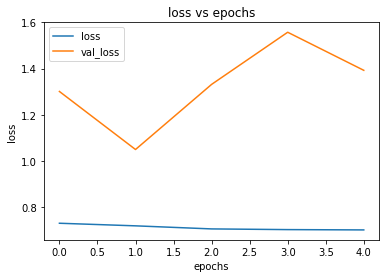

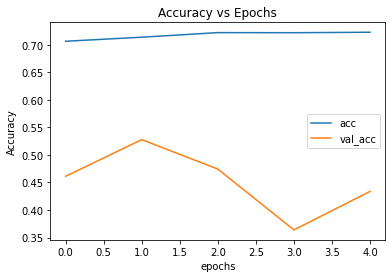

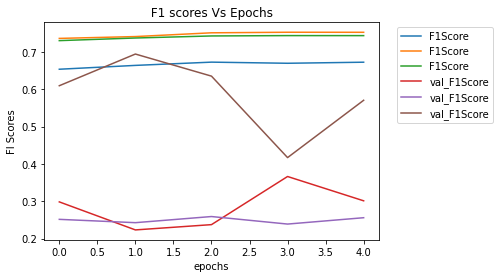

In [ ]:
import matplotlib.pyplot as plt
ax=plt.plot(history_2.history['loss'], label='loss')
ax=plt.plot(history_2.history['val_loss'], label='val_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.legend()
plt.show()

plt.plot(history_2.history['acc'], label='acc')
plt.plot(history_2.history['val_acc'], label='val_acc')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend(loc="center right")
plt.show()


plt.plot(history_2.history['f1_score'], label='F1Score')
plt.plot(history_2.history['val_f1_score'], label='val_F1Score')
plt.xlabel("epochs")
plt.ylabel("Fl Scores")
plt.title(" F1 scores Vs Epochs ")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [ ]:

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
prediction_bnn=np.argmax(model_2.predict_on_batch(x_test_new),axis=-1)
from sklearn.metrics import classification_report, confusion_matrix    
# print classification report 
print(classification_report(y_test_new, prediction_bnn)) 


              precision    recall  f1-score   support

           0       0.33      0.38      0.35       277
           1       0.20      0.32      0.25       213
           2       0.72      0.57      0.63       825

    accuracy                           0.49      1315
   macro avg       0.42      0.42      0.41      1315
weighted avg       0.55      0.49      0.51      1315



In [ ]:
model_2.save('/content/gdrive/MyDrive/Ml_project/bi_lstm64_dns1024_1024_128acc56.h5')

# loading earlier version of trained model from google drive- LSTM  (Additional Work)

In [ ]:
from tensorflow import keras
model_l = keras.models.load_model('/content/gdrive/MyDrive/Ml_project/bi_lstm64_dns1024_1024_128acc56.h5')

In [ ]:
model_l.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                      

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
prediction_bnn_l=np.argmax(model_l.predict_on_batch(x_test_new),axis=-1)
from sklearn.metrics import classification_report, confusion_matrix    
# print classification report 
print(classification_report(y_test_new, prediction_bnn_l)) 

              precision    recall  f1-score   support

           0       0.33      0.37      0.35       277
           1       0.23      0.25      0.24       213
           2       0.71      0.66      0.68       825

    accuracy                           0.53      1315
   macro avg       0.42      0.43      0.42      1315
weighted avg       0.55      0.53      0.54      1315



No siginificant change, so decided to go with the earlier version

# Multinomial Naive Bayes


## hyper parameter tuning

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 


#Hyper parameter tuning and fitting the best hyperparameters

parameters = {'alpha': np.arange(0.001,0.02,0.001)}
model_nb=MultinomialNB()
clf = GridSearchCV(model_nb, parameters,verbose=3,scoring='accuracy',cv=10)
clf.fit(train_vectors,train_labels_mnb)
print(clf.best_params_) 
print(classification_report(test_labels_mnb, clf.predict(test_vectors))) 


Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END ......................alpha=0.001;, score=0.857 total time=   0.0s
[CV 2/10] END ......................alpha=0.001;, score=0.851 total time=   0.0s
[CV 3/10] END ......................alpha=0.001;, score=0.847 total time=   0.0s
[CV 4/10] END ......................alpha=0.001;, score=0.853 total time=   0.0s
[CV 5/10] END ......................alpha=0.001;, score=0.852 total time=   0.0s
[CV 6/10] END ......................alpha=0.001;, score=0.858 total time=   0.0s
[CV 7/10] END ......................alpha=0.001;, score=0.846 total time=   0.0s
[CV 8/10] END ......................alpha=0.001;, score=0.850 total time=   0.0s
[CV 9/10] END ......................alpha=0.001;, score=0.843 total time=   0.0s
[CV 10/10] END .....................alpha=0.001;, score=0.864 total time=   0.0s
[CV 1/10] END ......................alpha=0.002;, score=0.857 total time=   0.0s
[CV 2/10] END ......................alpha=0.00

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
nb_model=MultinomialNB(alpha=0.006)
cv_results = cross_validate(nb_model,train_vectors,train_labels_mnb, cv=5,verbose=1,return_estimator=True)
accuracies_nb = cv_results['test_score']
accuracies_nb=list(accuracies_nb)
nb_models=cv_results['estimator']
nb_model = nb_models[accuracies_nb.index(max(accuracies_nb))]
predictions_nb = nb_model.predict(test_vectors) 
   
# print classification report 
print(classification_report(test_labels_mnb, predictions_nb)) 


              precision    recall  f1-score   support

           0       0.53      0.51      0.52       277
           1       0.53      0.60      0.56       213
           2       0.83      0.82      0.83       825

    accuracy                           0.72      1315
   macro avg       0.63      0.64      0.64      1315
weighted avg       0.72      0.72      0.72      1315



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


comments: Trained using different vectorizer method, tf-idf, bag of words, 

# Random Forest

## Hyper parameter tuning and training the best Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix 


#Hyper parameter tuning and fitting the best hyperparameters
#
parameters = {'criterion': ('gini','entropy'),'max_depth':np.arange(30,35)}
model_rf=RandomForestClassifier()
clf = GridSearchCV(model_rf, parameters,verbose=3,scoring='accuracy',cv=3)
clf.fit(x_train_new,y_train_new)
print(clf.best_params_) 
print(classification_report(y_test_new, clf.predict(x_test_new))) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ......criterion=gini, max_depth=30;, score=0.788 total time=   4.4s
[CV 2/3] END ......criterion=gini, max_depth=30;, score=0.802 total time=   3.2s
[CV 3/3] END ......criterion=gini, max_depth=30;, score=0.796 total time=   3.1s
[CV 1/3] END ......criterion=gini, max_depth=31;, score=0.791 total time=   3.1s
[CV 2/3] END ......criterion=gini, max_depth=31;, score=0.797 total time=   3.1s
[CV 3/3] END ......criterion=gini, max_depth=31;, score=0.795 total time=   3.1s
[CV 1/3] END ......criterion=gini, max_depth=32;, score=0.784 total time=   3.1s
[CV 2/3] END ......criterion=gini, max_depth=32;, score=0.802 total time=   3.1s
[CV 3/3] END ......criterion=gini, max_depth=32;, score=0.793 total time=   3.1s
[CV 1/3] END ......criterion=gini, max_depth=33;, score=0.787 total time=   3.1s
[CV 2/3] END ......criterion=gini, max_depth=33;, score=0.803 total time=   3.1s
[CV 3/3] END ......criterion=gini, max_depth=33;

## Results

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate
rf_model=RandomForestClassifier(criterion='entropy',max_depth=34)   
rf_model.fit(x_train_new,y_train_new)
# print classification report 
print(classification_report(y_test_new, rf_model.predict(x_test_new))) 

              precision    recall  f1-score   support

           0       0.38      0.28      0.32       277
           1       0.27      0.24      0.26       213
           2       0.72      0.80      0.76       825

    accuracy                           0.60      1315
   macro avg       0.46      0.44      0.45      1315
weighted avg       0.58      0.60      0.59      1315



# K-means (unsupervised learning)

In [ ]:
#kmeans classifier unsupervised
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix 
# Apply the k-means algorithm
k_model = KMeans(n_clusters=3)
k_model.fit(train_vectors_tfidf)
print(classification_report(test_labels_mnb, k_model.predict(test_vectors_tfidf))) 

              precision    recall  f1-score   support

           0       0.10      0.03      0.05       277
           1       0.93      0.07      0.12       213
           2       0.66      0.97      0.78       825

    accuracy                           0.62      1315
   macro avg       0.56      0.35      0.32      1315
weighted avg       0.59      0.62      0.52      1315



# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
# Apply the k-means algorithm
svc_model = SVC()
svc_model.fit(train_vectors_tfidf[:9000],train_labels_tfidf[:9000])
print(classification_report(test_labels_mnb, svc_model.predict(test_vectors_tfidf))) 

              precision    recall  f1-score   support

           0       0.50      0.58      0.54       277
           1       0.67      0.67      0.67       213
           2       0.86      0.82      0.84       825

    accuracy                           0.74      1315
   macro avg       0.68      0.69      0.68      1315
weighted avg       0.75      0.74      0.75      1315



#Ensambled method using svc and naive bayes

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_validate

svc= svc_model
nb=nb_model
models = [('nb',nb),('svc',svc)] 

stacking_model = LogisticRegression(solver='sag',random_state=0,max_iter=200)
stacked_model = StackingClassifier( estimators = models,final_estimator = stacking_model)
cv_results_s = cross_validate(stacked_model, train_vectors_tfidf[:9000],train_labels_tfidf[:9000], cv=5,verbose=1,return_estimator=True)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished


Cross-validation graph

Text(0, 0.5, 'Accuracy')

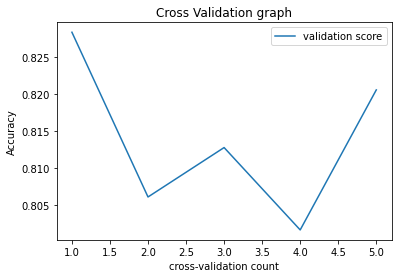

In [ ]:
import matplotlib.pyplot as plt

d={'t':[1,2,3,4,5],'validation score':cv_results_s['test_score'][:5]}
pd.DataFrame(d).plot.line('t','validation score')
plt.title("Cross Validation graph")
plt.xlabel("cross-validation count")
plt.ylabel("Accuracy")


In [ ]:
cv_results_s['test_score'][:5]

array([0.82833333, 0.80611111, 0.81277778, 0.80166667, 0.82055556])

In [ ]:
pre_st=cv_results_s['estimator'][3].predict(test_vectors_tfidf)

In [ ]:
print(classification_report(test_labels_mnb, pre_st)) 

              precision    recall  f1-score   support

           0       0.53      0.54      0.54       277
           1       0.64      0.70      0.67       213
           2       0.86      0.83      0.84       825

    accuracy                           0.75      1315
   macro avg       0.67      0.69      0.68      1315
weighted avg       0.75      0.75      0.75      1315



#(Additional work done)

#checking using lazy classifier- for getting best classifier using K-mean algorithm

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,prediction=clf.fit(x_train_new[:1000],x_test_new,y_train_new[:1000],y_test_new)
print(models)

100%|██████████| 29/29 [00:10<00:00,  2.81it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.47               0.46    None      0.50   
RandomForestClassifier             0.52               0.46    None      0.54   
BernoulliNB                        0.40               0.43    None      0.43   
ExtraTreesClassifier               0.47               0.43    None      0.50   
BaggingClassifier                  0.43               0.42    None      0.46   
AdaBoostClassifier                 0.45               0.42    None      0.48   
PassiveAggressiveClassifier        0.37               0.41    None      0.39   
Perceptron                         0.34               0.40    None      0.36   
NuSVC                              0.36               0.40    None      0.37   
KNeighborsClassifier               0.36               0.40    None      0.38   
LGBMClassifier                     0.43 

# BERT-Transformer based model

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

!pip install transformers requests beautifulsoup4 pandas numpy
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
data[data["airline_sentiment"]=="neutral"].head(10)

,tweet_id,text,airline_sentiment
5,569617089155211265,@AmericanAir just downloaded the app for iPhon...,neutral
7,570287303681294337,@JetBlue I'm not sure if you can do anything t...,neutral
17,568586231409475584,@SouthwestAir seems like you could make more m...,neutral
24,568095662262358016,@united this is me and my partners first trip ...,neutral
27,568492682152189952,@VirginAmerica partners with @Visa Checkout as...,neutral
34,568077686507229184,@USAirways just realized my @AmericanAir advan...,neutral
47,567802111321444352,@united do you think there Will problems at Ne...,neutral
48,568812654346653697,@JetBlue OK cool. I need to listen to some Dr...,neutral
49,567935527481188352,@JetBlue Anywhere warm cause its freezing in NYC,neutral
51,568804534845345792,@USAirways can I book using some sort of breav...,neutral


In [ ]:
tokens = tokenizer.encode("@JetBlue OK cool. I need to listen to some Dre and Snoop en route to LA. That would have been a shame.", return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1

3

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
prediction=x_test[:100].apply(lambda x: sentiment_score(x))

In [ ]:
predictions= prediction.map({5: 1, 1: 2, 2 : 0,3:0,4:0})
predictions=np.array(predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
accuracy = accuracy_score(y_test_new[:100], predictions)
print('Accuracy:', accuracy)
print("F1 zscore(Macro) =  ",f1_score(y_test_new[:100],predictions,average="macro"))
print("F1 zscore =  ",f1_score(y_test_new[:100],predictions,average=None))

Accuracy: 0.7
F1 zscore(Macro) =   0.5242938856891863
F1 zscore =   [0.13793103 0.58823529 0.84671533]
